## Linear Regression :
Have you ever wondered if one predictor (independent feature) can predict the predicted variable (dependent feature). This project uses a single feature to predict the dependent variable. The accuracy can be measured by mutiple methods and we can check how good the fit is by using methods such as RMSE(Root Mean Square Error) and minimising them. 

Note: We are provided with labels so this is a supervised learning method. Regression can be multiple regression as well when we are trying to predict multiple variables. There may or may not be a relation between the two depending on the findings.

Note: In layman terms, we are trying to fit a line that will be used to explain the points that will enter the system at a later stage. In our system we will use the train set to train our model and then we will use the test set to check how well our model fits that data.

In [1]:
# Lets import the libraries required for computation:
import numpy as np # used for all the mathy things
import matplotlib.pyplot as plt # used for producing great visualizations
import pandas as pd #used for working with dataframes, uses numpy at background

In [2]:
#lets load the dataset and assign it to an object
train = pd.read_csv("train.csv")
#lets check for any missing values:
print(train.isnull().sum())

#the isnull() method checks if the values is missing or not and returns a boolean TRUE(Missing)=1 and ) otherwise.
#note: this works because the missing values are given a value of 1

x    0
y    1
dtype: int64


In [3]:
# as there is just 1 missing value lets just drop that as it won't matter much.
# we can use this by dropna() method.
train = train.dropna()


In [4]:
#lets load the dataset and allocate the dependent and the independent variables:
xtrain = np.array(train.iloc[:, :-1].values) # predictor variable (independent)
ytrain = np.array(train.iloc[:, 1].values) # predicted variable (dependent)
#lets have a look at our dataset
train


,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [5]:
#note above that all the data is converted into float even though they were not so initially for all values
type(train['x'][0])

numpy.float64

In [6]:
#loading the test set:
test = pd.read_csv("test.csv")
# drop the rows with missing values as we have done above
test = test.dropna() 

xtest = np.array(test.iloc[:, :-1].values) # predictor variable
ytest = np.array(test.iloc[:, 1].values) # predicted variable
test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


### Sklearn has many algorithms preloaded that we just need to call them
Lets train our algorithm using the data

In [9]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression.fit(xtrain,ytrain)
#lets check the accuracy of our model:
accuracy = LinearRegression.score(xtest, ytest)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.9888014444327563


## WHOA ! 
This kind of accuracy is only rarely observed.
Psst. This means that they are highly correlated, which means that if one goes up the other goes up and vice versa.

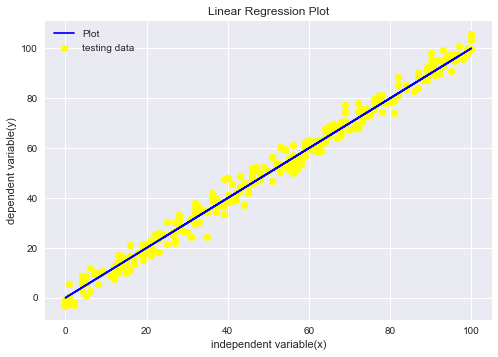

In [24]:
#lets plot our data and visualize the results:
plt.scatter(xtest, ytest, color = 'yellow',
          label = 'testing data')
plt.plot(xtrain, LinearRegression.predict(xtrain), color = 'blue', label='Plot')
plt.xlabel('independent variable(x)')
plt.ylabel('dependent variable(y)')
plt.legend(loc = 'best')
plt.title('Linear Regression Plot')
plt.show()